In [1]:
import sys
sys.path.append('../asp')

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as nnF 
import torch.functional as ptF
import torch.optim as optim

import torchvision.transforms as xf
import torchvision.transforms.functional as tvF

import matplotlib.pyplot as plt

device = torch.device("cpu")
torch_dtype = torch.float64

print(torch.__version__) 
print(device)

%load_ext autoreload
%autoreload 2
%matplotlib notebook

1.9.0+cu102
cpu


In [2]:
#Defining Parameters

m = 1
cm = 10**-2
mm = 10**-3
um = 10**-6
nm = 10**-9



d2r = np.pi/180

#sizex = 500
#sizey = 500

multiply_factor = 1

l_x = 20 * mm * multiply_factor 
l_y = 20 * mm * multiply_factor

print(type(l_x))

dx = 295*um / 100 * multiply_factor
dy = 295*um / 100 * multiply_factor

sizex = int(l_x/dx)
sizey = int(l_y/dx)

print('dx:', dx/um, "um, dy:", dy/um, 'um')
print('Grid Size:', sizey, 'x', sizex)

refractive_index = 1.0
wavelength = 632.8 * nm

<class 'float'>
dx: 2.9499999999999997 um, dy: 2.9499999999999997 um
Grid Size: 6779 x 6779


Size of Field:  19.998049999999996 x 19.998049999999996 mm^2
Gaussian Spot Size:  0.030000000000000002 mm and Rayleigh Length:  4.468131144486115 mm
Gaussian Spot Size:  0.030000000000000002 mm and Rayleigh Length:  4.468131144486115 mm
Gaussian Spot Size:  0.030000000000000002 mm and Rayleigh Length:  4.468131144486115 mm
Gaussian Spot Size:  0.030000000000000002 mm and Rayleigh Length:  4.468131144486115 mm
Gaussian Spot Size:  0.030000000000000002 mm and Rayleigh Length:  4.468131144486115 mm
Gaussian Spot Size:  0.030000000000000002 mm and Rayleigh Length:  4.468131144486115 mm


<IPython.core.display.Javascript object>


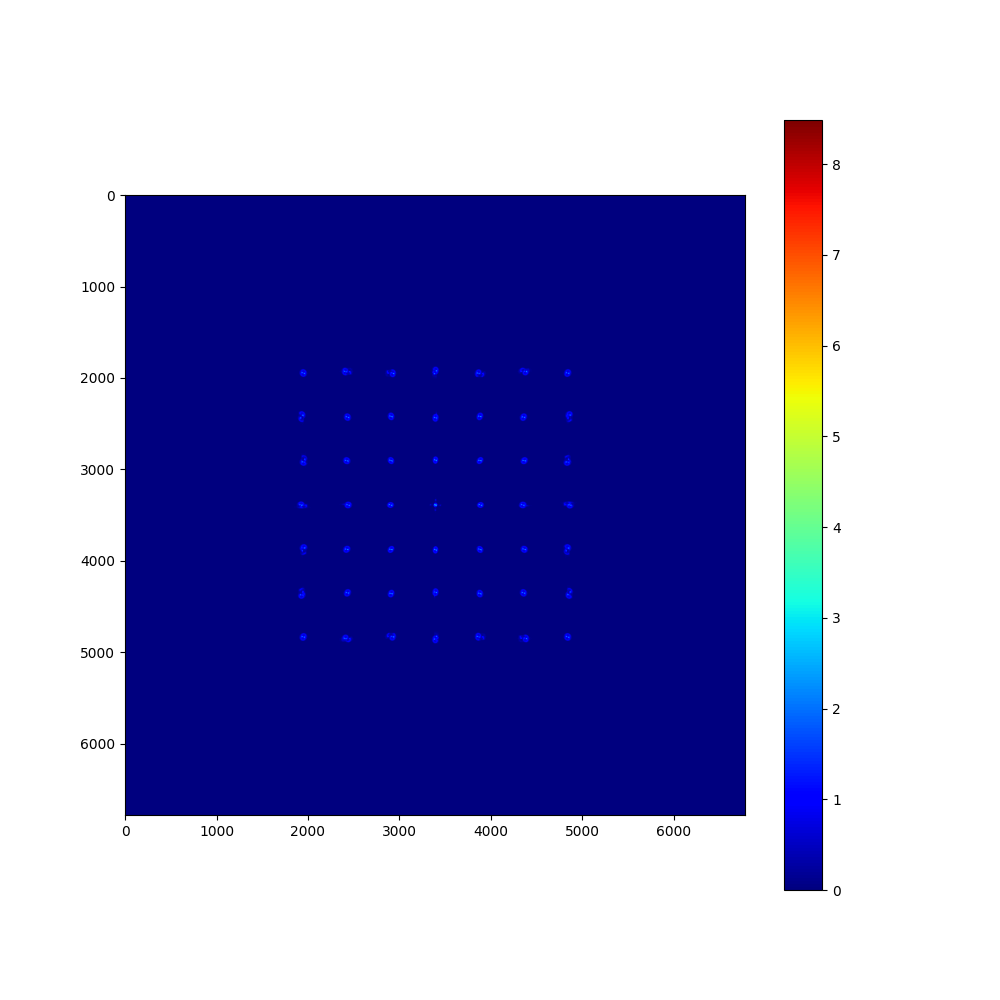

In [3]:
from angular_spectrum_prop import angular_spectrum

asp = angular_spectrum(dx=dx , dy=dy, 
                  refractive_index=refractive_index, wavelength=wavelength, 
                  sizex=sizex, sizey=sizey, device=device)


#Getting a Spehiral Wave
Ch = asp.sphericalWaveZ(zero_loc=[0,0,-1*mm])
Ch = Ch/torch.abs(Ch) #normalizing the wave everywhere, intensity 1, only phase is varying

#make it go through the GL array
U_gl, H_gl, param_gl = asp.GaussLaguerreArrayZ(Ch, array_size=[7,7], 
                                            rect_x=10*mm, rect_y=10*mm, 
                                            w0=0.03*mm,A=1)

#propagate the wave a little bit
U, H_0 = asp.propagateZ(U_gl,dz=0.5*mm)

plt.figure(figsize=[10,10])
plt.imshow(asp.abs(U), cmap='jet')
#plt.xlim([510,850])
#plt.ylim([510,850])
plt.colorbar()
#plt.savefig('Rotated_Amplitude_Images.png', dpi=120)